In [226]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt  
import seaborn as sns

# Implement Logistic Regression

This will be helpful to further familiarize yourself with Numpy and how Logistic Regression actually works.
If you face any problems, feel free to contact us in Slack

### Load the breast cancer dataset (from sklearn)

In [227]:
from sklearn.datasets import load_breast_cancer
breast_cancer_dataset = load_breast_cancer()

breast_cancer = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

breast_cancer.drop(breast_cancer.columns[[-1, 0]], axis=1, inplace=True)
breast_cancer.head()

,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,...,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry
0,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,...,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,...,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,...,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,...,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


In [228]:
breast_cancer['class'] = breast_cancer_dataset.target

X = breast_cancer.drop('class', axis=1)
y = breast_cancer['class']

### Train test split

In [229]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 28)
(171, 28)
(398,)
(171,)


### Apply feature scaling on the data

In [230]:
# def normalization(X,features):
#     for feature in features:
#         minimum = min(X[feature])
#         maximum = max(X[feature])
#         X[feature] = (X[feature] -minimum) / (maximum - minimum)
#     return X
# features_train = X_train.columns
# X_train = normalization(X_train,features_train)

# features_test = X_test.columns
# X_test = normalization(X_test,features_test)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Define the Parameters (W or Θ) here
Create an appropriate shape numpy array for W

In [231]:
w = np.random.uniform(-1, 1, X_train.shape[1])
lr =  0.1
w.shape

(28,)

### Define sigmoid and its derivative
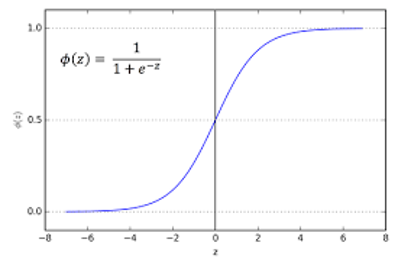

In [232]:
def sigmoid(z):
    # Apply sigmoid to X and return 
    return 1.0 / (1 + np.exp(-z))

### Prediction methods

In [233]:
def predict_prob(X, w):
    # Return the class probabilities here
    z = np.dot(X, w)
    return sigmoid(z)



### Define the Cross entropy loss function

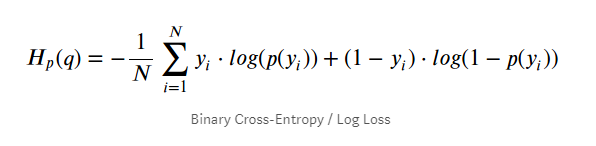

In [234]:
# Code here
def binary_cross_entropy(y, yhat):
    m = y.shape[0]

    #Take the error when label=1
    class1_cost = -y*np.log(yhat)

    #Take the error when label=0
    class2_cost = (1-y)*np.log(1-yhat)

    #Take the sum of both costs
    cost = class1_cost - class2_cost

    #Take the average cost
    cost = cost.sum() / m

    return cost

In [235]:
yhat = predict_prob(X_train, w)
print(yhat)

[0.35346144 0.5881523  0.53533961 0.58309869 0.49972132 0.46658715
 0.60889257 0.46465644 0.56380568 0.4272571  0.58448074 0.47796746
 0.45005328 0.53969856 0.43565021 0.49030194 0.51621404 0.4513125
 0.50330264 0.55444882 0.54060511 0.49001199 0.5715558  0.49799108
 0.43930351 0.41110075 0.52069881 0.48990502 0.41592436 0.47627266
 0.54618167 0.31753919 0.52327388 0.36543104 0.51378439 0.59983365
 0.47609249 0.47257916 0.52868028 0.47304302 0.53442531 0.47732753
 0.6032263  0.61966052 0.48681178 0.49104352 0.48968033 0.51155391
 0.42371648 0.61636841 0.42043132 0.5848909  0.47267614 0.50032678
 0.59471153 0.48091425 0.50293395 0.63832915 0.45611197 0.403567
 0.44204067 0.48310452 0.64395722 0.47539803 0.54167949 0.5143578
 0.586672   0.42361784 0.4565788  0.38758601 0.57424803 0.45853857
 0.51782435 0.40671577 0.49316197 0.44044215 0.37616488 0.51579543
 0.62400595 0.68335058 0.49878855 0.4946775  0.55966345 0.4584117
 0.38415569 0.49939176 0.41476081 0.41411402 0.57525629 0.39763995


In [236]:
loss = binary_cross_entropy(y_train, yhat)
print(loss)

0.7002210523021832


# Solve using Gradient Descent

### Calculate gradient
For practice, you can try to derive the gradient using pen and paper

In [237]:
def compute_gradient(X, y, w):
    # Code here
    m = y.shape[0]
    dw = (1/m) * np.dot(X.T,  predict_prob(X,w) - y)
    return dw

### Update Weights

In [238]:
# Code here
w = w - lr*compute_gradient(X_train, y_train, w)

### Repeat for N- Iterations

In [239]:
N = 10000
losses = []
for i in range(N):
    # Predict
    yhat = predict_prob(X_train, w)
    
    # Calculate Loss
    loss = binary_cross_entropy(y_train, yhat)
    
    # Compute gradient dL/dW
    dw = compute_gradient(X_train, y_train, w)
    
    # Update the weights
    w = w - lr*dw
    
    losses.append(loss)

### Plot the loss curve

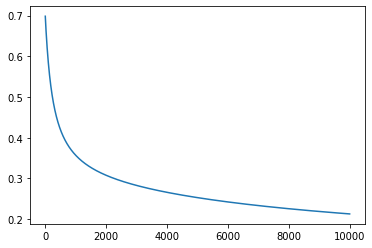

In [240]:
# Loss curve here
plt.plot(losses)
plt.show()

### Calculate the classification report and the confusion matrix

In [241]:
from sklearn.metrics import classification_report, confusion_matrix

In [242]:
# Scores here
yhat = yhat.round()

print(confusion_matrix(y_train, yhat))
print(classification_report(y_train, yhat))

[[141  17]
 [ 21 219]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       158
           1       0.93      0.91      0.92       240

    accuracy                           0.90       398
   macro avg       0.90      0.90      0.90       398
weighted avg       0.91      0.90      0.90       398



# BONUS: Create a LogisticRegression Class [OPTIONAL]
Create a Sklearn-like API

In [243]:
class LogisticRegression:
    # You can define additional functions as per your need
    def __init__(self, lr = 0.1, n_iters=10000):
        self.lr = lr
        self.n_iters = n_iters
        self.w = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.w = np.random.uniform(-1, 1, X.shape[1])

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            z = np.dot(X, self.w)
            # apply sigmoid function
            y_predicted = self._sigmoid(z)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            # update parameters
            self.w -= self.lr * dw

    def predict(self, X):
        z = np.dot(X, self.w)
        y_predicted = self._sigmoid(z)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

In [244]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test).round()

confusion_matrix_our = confusion_matrix(y_test, predictions)
classification_report_our = classification_report(y_test, predictions)

### Compare metrics with Sklearn's implementation

In [245]:
from sklearn.linear_model import LogisticRegression as SKLogisticRegression

In [246]:
sklearn_model = SKLogisticRegression()
sklearn_model.fit(X_train, y_train)
sklearn_predictions = sklearn_model.predict(X_test)


confusion_matrix_sklearn = confusion_matrix(y_test, sklearn_predictions)
classification_report_sklearn = classification_report(y_test, sklearn_predictions)


In [247]:
### compare classification report and confusion matrix here
print(f"Sklearn: {confusion_matrix_sklearn}")
print(f"Ours: {confusion_matrix_our}")
print(f"Sklearn: {classification_report_sklearn}")
print(f"Ours: {classification_report_our}")


Sklearn: [[ 54   0]
 [  1 116]]
Ours: [[ 48   6]
 [ 10 107]]
Sklearn:               precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.99      1.00       117

    accuracy                           0.99       171
   macro avg       0.99      1.00      0.99       171
weighted avg       0.99      0.99      0.99       171

Ours:               precision    recall  f1-score   support

           0       0.83      0.89      0.86        54
           1       0.95      0.91      0.93       117

    accuracy                           0.91       171
   macro avg       0.89      0.90      0.89       171
weighted avg       0.91      0.91      0.91       171

